In [16]:
#imports
from time import *
from sklearn import tree
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
start_time = time.time()
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [17]:
start = dt.datetime(2019,1,1)
end = dt.datetime(2020,12,31)

In [18]:
stockSymbol = 'QCOM'
df = pdr.get_data_yahoo(stockSymbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [19]:
df.to_csv('QCOM.csv')

In [20]:
df1 = pd.read_csv('QCOM.csv', parse_dates = True)

In [21]:
acc = 10
Points = []
Highs = []
Lows = []
Volumes = []
dates = []
CashRecords = []

Cash = 100
Bought = False
days = 0
decision = 0

In [22]:
style.use('ggplot')

In [23]:
for i in df1[['Close']]:
    count = 0
    for j in df1[i]:
        Points.append(round(j,2))


In [24]:
for i in df1[['High']]:
    for j in df1[i]:
        Highs.append(round(j,2))

In [25]:
for i in df1[['Volume']]:
    for j in df1[i]:
        Volumes.append(round(j,2))

In [26]:
for i in df1[['Date']]:
    count = 0
    for j in df1[i]:
        dates.append(dt.datetime.strptime(j, "%Y-%m-%d"))

In [27]:
acc1 = 10
Points1 = []
Highs1 = []
Lows1 = []
Volumes1 = []
dates = []
CashRecords = []

Cash = 100
Bought = False
days = 0
decision = 0

In [28]:
Points1=df1['Close'].copy();
Highs1=df1['High'].copy();
Lows1=df1['Low'].copy();
Volumes1=df1['Volume'].copy();
CashRecords = []
main_set=pd.concat([Points1,Highs1,Lows1,Volumes1],axis=1)

In [29]:
for i in df1[['Date']]:
    count = 0
    for j in df1[i]:
        dates.append(dt.datetime.strptime(j, "%Y-%m-%d"))

Ending Cash: 306.53
Expected Cash: 263.49
Performance: 116.34%


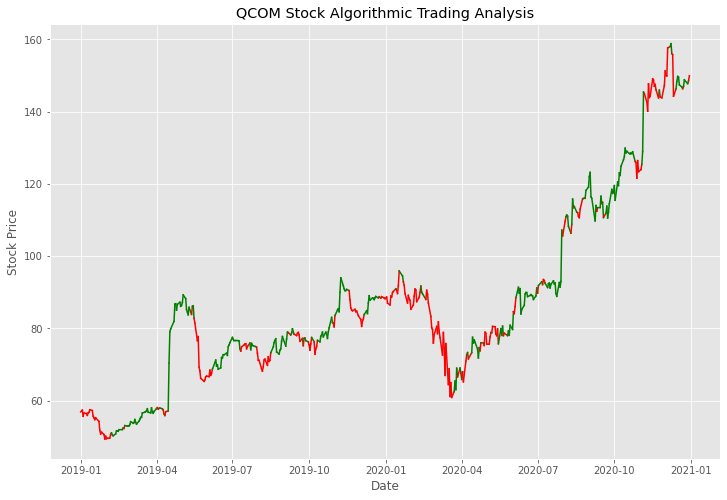

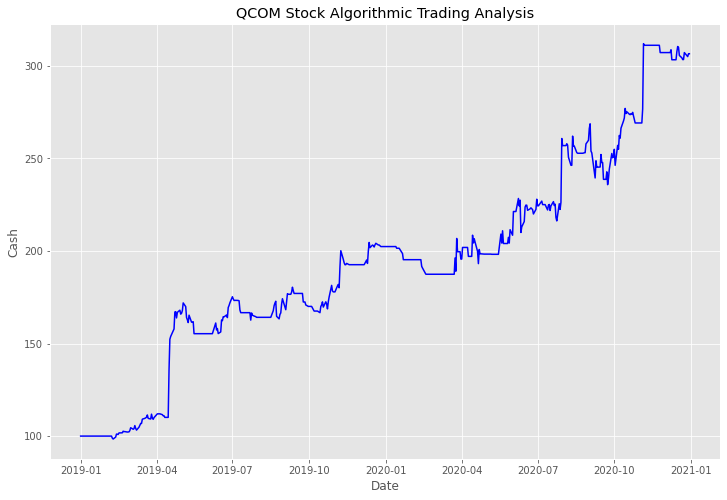

In [30]:
plt.figure(num = stockSymbol,figsize=(12, 8))
plt.title(stockSymbol + " Stock Algorithmic Trading Analysis")
plt.xlabel('Date')
plt.ylabel('Stock Price')

while days <= len(df1[['Close']]) - 1:
    
    #stock info
    days += 1
    StockPrice = Points[days - 1]
    
    if days == 1:
        initP = StockPrice
        initC = Cash
    
    if Bought == True:
        Cash = round(Cash*StockPrice/Points[days-2],2)
        c = "green"
    else:
        c = "red"
                  
    CashRecords.append(Cash)
    #print(Bought)
    #your money
    
    
    if days > acc1:
        oset=main_set.iloc[days-1-acc1:days].copy().reset_index(drop=True)
        l1=oset.copy()
        l1=l1.iloc[:acc1+1]
        y1=l1['Close'].copy()
        for i in range(acc1):
            y1[i]=y1[i+1]-y1[i]
        y1[acc1]=0
        train=l1.iloc[:acc1].copy()
        y2=y1.iloc[:acc1].copy()
        for i in range(acc1):
            if(y2[i]<0):
                y2[i]=0
            else:
                y2[i]=1
        clf=LogisticRegression()
        clf.fit(train,y2)
        if clf.predict(l1.iloc[acc1:])[0]==1:
            Bought=True
        else:
            Bought=False
    plt.plot(dates[days - 2:days], Points[days-2:days], color=c)

print("Ending Cash: " + str(CashRecords[-1]))
print("Expected Cash: " + str(round(CashRecords[0] * Points[-1] / Points[0],2)))
print("Performance: " + str(round(100 * CashRecords[-1] * Points[0] / (Points[-1] * CashRecords[0]),2)) + "%")

plt.show()

plt.figure(num = stockSymbol,figsize=(12, 8))
plt.title(stockSymbol + " Stock Algorithmic Trading Analysis")
plt.xlabel('Date')
plt.ylabel('Cash')
plt.plot(dates, CashRecords, color='blue')
plt.show()
    
    